In [516]:
import numpy as np
import pandas as pd

#visualization libraries
import seaborn as sns


import sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Gather the data

In [517]:
# Read in training and testing data using
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# See a sample of the dataset
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S


# 2. Explore the Data

In [518]:
# See a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jacobsohn, Mr. Sidney Samuel",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Feature type summary:


| Feature Type |   |   |   |   |
|  ----  | ----  | ----  | ----  | ----  |
| Continuous Features| Age (Continuous) | Fare (Continuous)| SibSp (Discrete)| Parch (Discrete)|
| Categorical Features| Survived | Sex | Embarked | Pclass |
| Alphanumeric Features| Ticket| Cabin| | |





# 3. Data Cleaning and Data Visualization

There are 4 stage to do data cleaning:

- Correcting: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.
- Completing: There are null values or missing data in the age, cabin, and embarked field.
- Creating: we might need to use existing features to create new features to determine if they provide new signals to predict our outcome.
- Converting: we will convert object datatypes to categorical dummy variables.

In [519]:
print('Features with null values:\n', train.isnull().sum())

Features with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data completing:

### Missing feature summary:
The Age, Cabin and Embarked feature is not complete
- Age: missing 177 features, 19.87% are missing. Since the age feature is relatively important, so we will complete them using the mean of age.

- Cabin: missing 687 features, 77.10% are missing, we will drop this column.

- Embarked: missing 2 features, 0.22% are missing, which should be relatively harmless.

In [520]:
train['Age'].fillna(train['Age'].median(), inplace = True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)


CabinFeature = train.iloc[:,[1, 10]]
TicketFeature = train.iloc[:,[1, 8]]
PassengerIdFeature = train.iloc[:,[1, 0]]

drop_column = ['Cabin', 'Ticket', 'PassengerId']
train.drop(drop_column, axis=1, inplace = True)


# print('Features with null values:\n', train.isnull().sum())

train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
602,0,1,"Harrington, Mr. Charles H",male,28.0,0,0,42.4000,S
26,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,7.2250,C
154,0,3,"Olsen, Mr. Ole Martin",male,28.0,0,0,7.3125,S
661,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,7.2250,C
458,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,10.5000,S


## Data correcting:

- We care about whether there exit some unacceptable data inputs. For example, a person has age greater than 120.
- In the meantime, we want to check whether there is some outlier (but reasonable values), and we will wait until after we complete our analysis to determine if we should include them to our dataset.

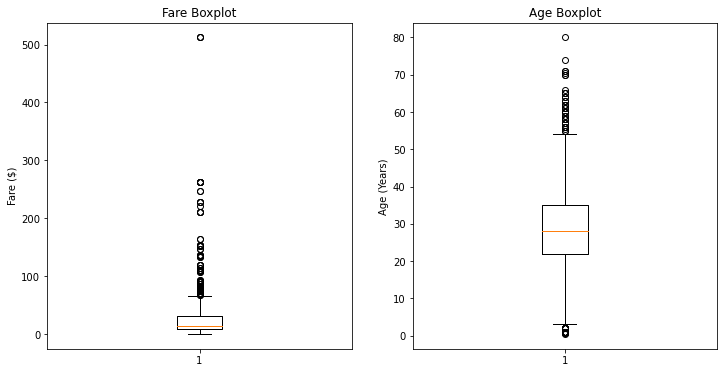

In [521]:
plt.figure(figsize=[12, 6])
plt.subplot(121)
plt.boxplot(x=train['Fare'])
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(122)
plt.boxplot(train['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()


From above boxplot we can see that:
- The age feature is welled distributed and all acceptable.
- The fare feature is all acceptable but has one outlier has value 500.


## Data Creating:

First, we will explore our data with graphical statistics to describe and summarize our variables. After we got the graphical statistics, we can determining their correlation with the target variable and each other.

In [522]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


train['Title'] = train['Title'].apply(lambda x: 'Other' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,7.9250,S,Mr
218,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,76.2917,C,Miss
605,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,15.5500,S,Mr
174,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,30.6958,C,Mr
582,0,2,"Downton, Mr. William James",male,54.0,0,0,26.0000,S,Mr
844,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,8.6625,S,Mr
649,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,7.5500,S,Miss
210,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,7.0500,S,Mr
779,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,211.3375,S,Mrs
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,69.5500,S,Mr


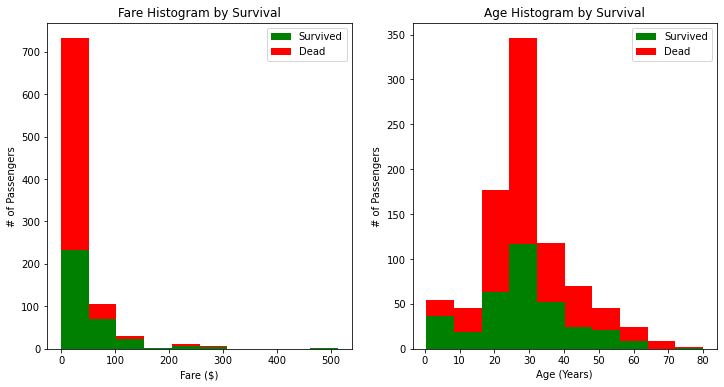

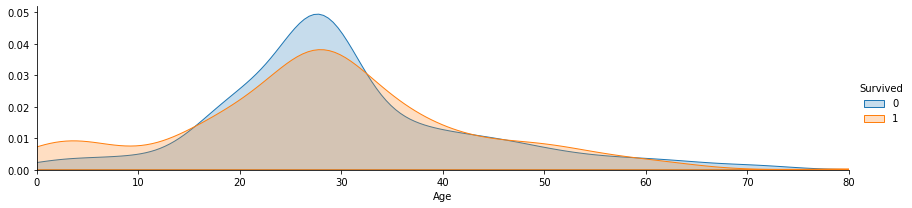

In [523]:
plt.figure(figsize=[12, 6])

plt.subplot(121)
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(122)
plt.hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

<AxesSubplot:xlabel='Title', ylabel='Survived'>

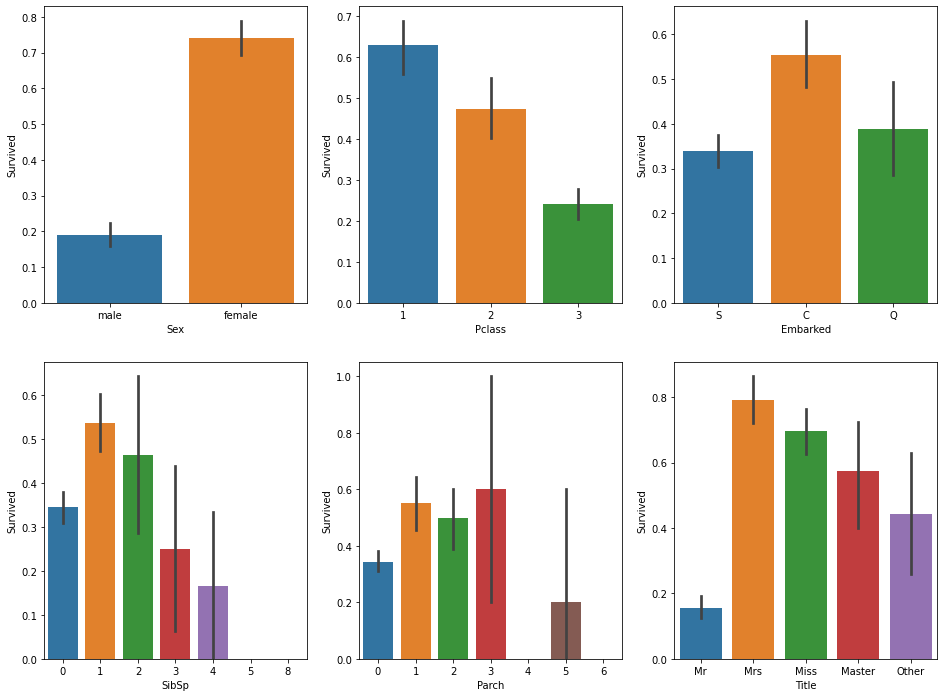

In [524]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x="Sex", y="Survived", data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.barplot(x="SibSp", y="Survived", data=train, ax = saxis[1,0])

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,2])
sns.barplot(x="Parch", y="Survived", data=train, ax = saxis[1,1])

sns.barplot(x="Title", y="Survived", data=train, ax = saxis[1,2])

From plot above, there may be some relation between SibSp and Parch, therefore we construct a new feature called family size.

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

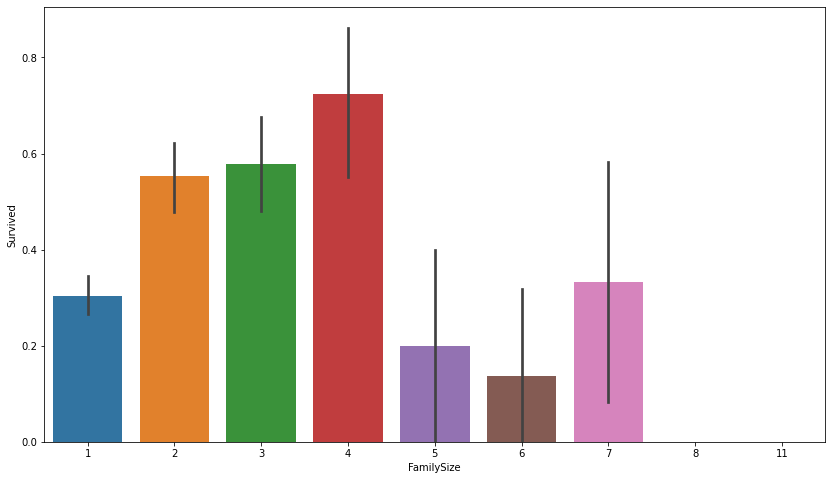

In [483]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1

fig, (axis1) = plt.subplots(1,1,figsize=(14,8))
sns.barplot(x = 'FamilySize', y = 'Survived', data=train, ax = axis1)

## Data Converting
We will convert object datatypes to categorical dummy variables. The categorical features we have are sex, enbarked and title.

In [484]:
label = LabelEncoder()

train['Sex_Code'] = label.fit_transform(train['Sex'])
train['Embarked_Code'] = label.fit_transform(train['Embarked'])
train['Title_Code'] = label.fit_transform(train['Title'])

In [485]:
train.sample(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
349,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,8.6625,S,Mr,1,1,2,2
189,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,7.8958,S,Mr,1,1,2,2
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S,Mr,6,1,2,2
605,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,15.5500,S,Mr,2,1,2,2
645,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,76.7292,C,Mr,2,1,0,2
377,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,211.5000,C,Mr,3,1,0,2
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,82.1708,C,Mr,2,1,0,2
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,52.0000,S,Mr,1,1,2,2
561,0,3,"Sivic, Mr. Husein",male,40.0,0,0,7.8958,S,Mr,1,1,2,2
173,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,7.9250,S,Mr,1,1,2,2


In [486]:
train.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,NaN,"Jacobsohn, Mr. Sidney Samuel",male,NaN,NaN,NaN,NaN,S,Mr,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,517,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,1.904602,0.647587,1.536476,1.906846
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,1.613459,0.477990,0.791503,0.798361
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,1.000000,0.000000,1.000000,2.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,1.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,2.000000,1.000000,2.000000,2.000000


# 4. Data Cleaning for test data


In [487]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S
111,1003,3,"Shine, Miss. Ellen Natalia",female,NaN,0,0,330968,7.7792,NaN,Q
108,1000,3,"Willer, Mr. Aaron (Abi Weller"")""",male,NaN,0,0,3410,8.7125,NaN,S
311,1203,3,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,NaN,C


In [488]:
print('Features with null values:\n', test.isnull().sum())

Features with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The Age, Cabin and Embarked feature is not complete
- Age: missing 177 features. Since the age feature is relatively important, so we will complete them using the mean of age.

- Cabin: missing 687 features, we will drop this column.

- Fare: missing 1 features, which should be relatively harmless.

In [489]:
drop_column = ['Cabin', 'Ticket', 'PassengerId']
test.drop(drop_column, axis=1, inplace = True)

test['Age'].fillna(test['Age'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

test.sample(5)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
323,1,"Rowe, Mr. Alfred G",male,33.0,0,0,26.5500,S
246,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,21.0000,S
28,1,"Brady, Mr. John Bertram",male,41.0,0,0,30.5000,S
343,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,C
78,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,13.0000,S


In [490]:
print('Features with null values:\n', test.isnull().sum())

Features with null values:
 Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [491]:
test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

test['Title'] = test['Title'].apply(lambda x: 'Other' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

test['FamilySize'] = test ['SibSp'] + test['Parch'] + 1

label = LabelEncoder()

test['Sex_Code'] = label.fit_transform(test['Sex'])
test['Embarked_Code'] = label.fit_transform(test['Embarked'])
test['Title_Code'] = label.fit_transform(test['Title'])


In [492]:
test.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
332,3,"Thomas, Mr. Tannous",male,27.0,0,0,7.2250,C,Mr,1,1,0,2
403,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,47.1000,S,Mr,1,1,2,2
157,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,7.8542,S,Miss,1,0,2,1
29,3,"Samaan, Mr. Elias",male,27.0,2,0,21.6792,C,Mr,3,1,0,2
46,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,29.7000,C,Mr,1,1,0,2
48,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,76.2917,C,Mrs,1,0,0,3
298,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,45.5000,S,Mr,1,1,2,2
375,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,262.3750,C,Miss,1,0,0,1
15,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,27.7208,C,Mrs,2,0,0,3
96,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.8500,S,Mrs,2,0,2,3


In [493]:
train.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,NaN,"Jacobsohn, Mr. Sidney Samuel",male,NaN,NaN,NaN,NaN,S,Mr,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,517,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,1.904602,0.647587,1.536476,1.906846
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,1.613459,0.477990,0.791503,0.798361
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,1.000000,0.000000,1.000000,2.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,1.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,2.000000,1.000000,2.000000,2.000000


# 5. Model, predict and solve

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Naive Bayes classifier
- Decision Tree
- Neural network
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Random Forest

In [494]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [495]:
df_feature = ['Pclass', 'Sex_Code', 'Age', 'Fare', 'Embarked_Code',  'Title_Code', 'FamilySize', 'SibSp', 'Parch']

X = train[df_feature]
y = train["Survived"]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

x_train.head()

modelName = []
modelAcc= []

## Neural Network

In [496]:
# Create sturucture of the Neural Network
model = Sequential()
model.add(Dense(units = 32, input_shape = (9,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'uniform', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'uniform', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'uniform', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'uniform', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))


In [497]:
# Train the model with Adam optimizers
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, verbose = 1, epochs = 50)
score = model.evaluate(x_val, y_val, verbose=0)
NN_acc = score[1]
print(NN_acc)

modelName.append("Neural Network")
modelAcc.append(round(NN_acc*100, 2))

Epoch 1/50
20/20 [==============================] - 1s 1ms/step - loss: 0.6859 - accuracy: 0.6324
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6404
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6645
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6629
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6565
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6886
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7303
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.7400
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7608
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7448
Epoch 11/50
20/20 [

## Naive bayes

In [498]:
# I will train a Gaussian and a Bernoulli Naive Bayes model.
gaussian = GaussianNB()
Bernoulli = BernoulliNB()

gaussian.fit(x_train, y_train)
Bernoulli.fit(x_train, y_train)

BernoulliNB()

In [499]:
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

modelName.append("Gaussian Naive bayes")
modelAcc.append(acc_gaussian)

78.36


In [500]:
y_pred = Bernoulli.predict(x_val)
accBernoulli= round(accuracy_score(y_pred, y_val) * 100, 2)
print(accBernoulli)

modelName.append("Bernoulli Naive bayes")
modelAcc.append(accBernoulli)

78.73


## Logistic Regression

In [501]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

In [502]:
y_pred = logreg.predict(x_val)
logregacc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(logregacc)

modelName.append("Logistic Regression")
modelAcc.append(logregacc)

80.22


## Support Vector Machines

In [503]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [504]:
y_pred = svc.predict(x_val)
SVMACC = round(accuracy_score(y_pred, y_val) * 100, 2)
print(SVMACC)

modelName.append("Support Vector Machines")
modelAcc.append(SVMACC)

71.64


## Perceptron

In [505]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

41.42


In [506]:
y_pred = perceptron.predict(x_val)
PerceptronACC = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

modelName.append("Perceptron")
modelAcc.append(PerceptronACC)

41.42


## Decision Tree

In [507]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

In [508]:
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

modelName.append("Decision Tree")
modelAcc.append(acc_decisiontree)

78.36


## KNN

In [509]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [510]:
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

modelName.append("KNN")
modelAcc.append(acc_knn)

71.64


/Users/dongbochen/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Gradient Boosting

In [511]:
# Gradient Boosting
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

GradientBoostingClassifier()

In [512]:
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

modelName.append("Gradient Boosting")
modelAcc.append(acc_gbk)

84.33


## Random Forest

In [513]:
# Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)


RandomForestClassifier()

In [514]:
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

modelName.append("Random Forest")
modelAcc.append(acc_randomforest)

80.6


In [515]:
models = pd.DataFrame({
    'Model': modelName,
    'Score': modelAcc})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Gradient Boosting,84.33
9,Random Forest,80.60
0,Neural Network,80.22
3,Logistic Regression,80.22
2,Bernoulli Naive bayes,78.73
1,Gaussian Naive bayes,78.36
6,Decision Tree,78.36
4,Support Vector Machines,71.64
7,KNN,71.64
5,Perceptron,41.42
